# ***EDA para la ultima función get_recommendation***

In [2]:
import pandas as pd
import numpy as np
import re
import nltk

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.corpus import wordnet
import fastparquet



In [3]:
# importamos el Data Set
df = pd.read_csv("./DataSet/movies_dataset_Para_EDA.csv")

In [4]:
df.head()

,title,vote_average
0,Toy Story,7
1,Jumanji,6
2,Grumpier Old Men,6
3,Waiting to Exhale,6
4,Father of the Bride Part II,5


In [5]:
# Diccionario de palabras inutilies en ingles es 'english' en español es 'apanish'
stopwords = nltk.corpus.stopwords.words('english')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
stopwords
stopwords.append(":") # agregar una palabra inútil
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")

In [6]:
# Normalizamos el texto

stopwords = nltk.corpus.stopwords.words('english')

In [7]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [8]:
# depuramos la informacion y listamos en palabras el titulo
titulo_list=[]
for titulo in df.title:
    # Vamos a reemplazar los caracteres que no sean leras por espacios
    titulo=re.sub("[^a-zA-Z]"," ",str(titulo))
    # Pasamos todo a minúsculas
    titulo=titulo.lower()
    # Tokenizamos para separar las palabras del titular
    titulo=nltk.word_tokenize(titulo)

    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titulo]


    # Eliminamos las palabras de menos de 3 letras
    titulo = [palabra for palabra in titulo if len(palabra)>2]
    # Sacamos las Stopwords
    titulo = [palabra for palabra in titulo if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titulo=[stemmer.stem(palabra) for palabra in titulo]
    # Por ultimo volvemos a unir el titular
    titulo=" ".join(titulo)
    
    # Vamos armando una lista con todos los titulares
    titulo_list.append(titulo)
    #dataset["titular_normalizado"] = titular_list

In [9]:
# Creamos una nueva columna con las palabras mas significativas de los títulos de las películas
df["title_lemmatizer"] = titulo_list
df.head()

,title,vote_average,title_lemmatizer
0,Toy Story,7,toy stori
1,Jumanji,6,jumanji
2,Grumpier Old Men,6,grumpier old men
3,Waiting to Exhale,6,wait exhal
4,Father of the Bride Part II,5,father bride part


In [10]:
# Creamos un archivo con nuestro nuevo modelo de Data Set
df.to_parquet("./DataSet/data_set_EDA.parquet")

Al parser al lematizar la columna "title" se genera un erro 500 en render  
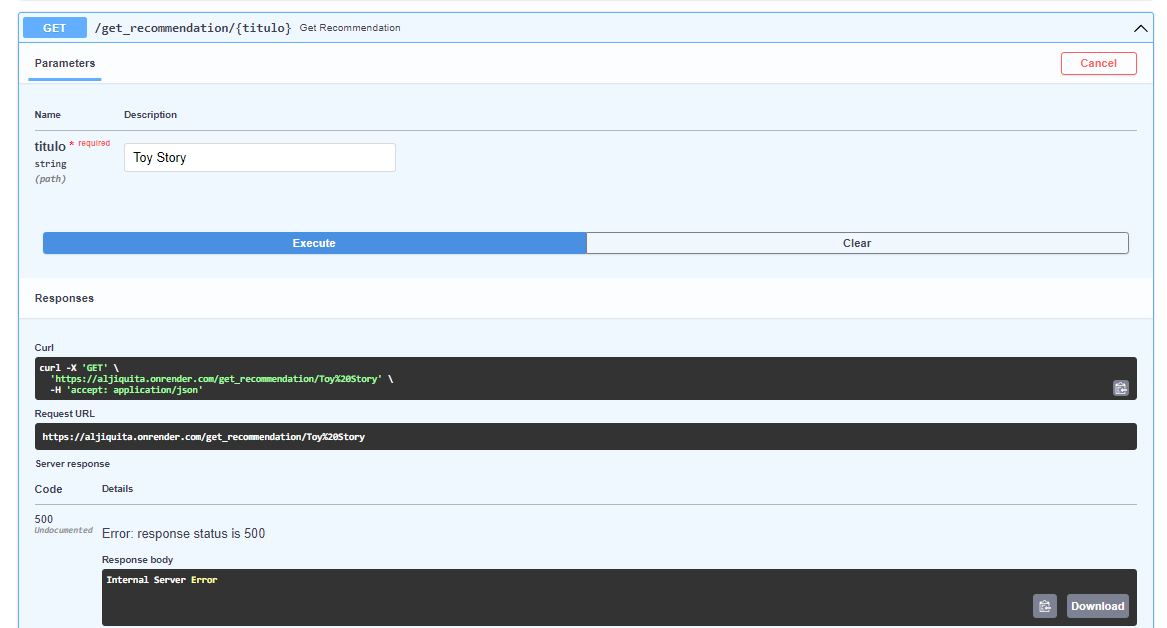